# **Overview of Cat vs Dog Image Classifier**

This code is designed to build, train, and evaluate a convolutional neural network (CNN) model for image classification using TensorFlow and Keras. The dataset consists of images of cats and dogs stored in separate directories for training and validation. Below is an overview of the key steps and processes in the code:

### Importing Libraries
- **Essential libraries** are imported for data handling, image processing, model building, and evaluation:
  - `pandas` and `numpy` for data manipulation.
  - `os` and `glob` for file handling.
  - `cv2` for image processing.
  - `matplotlib` and `seaborn` for data visualization.
  - `tensorflow` and `keras` for building and training neural networks.
  - `tqdm` for progress bars.
  - `warnings` to suppress warnings.

### Loading and Preparing the Dataset
- The paths to the training and validation image directories are specified.
- **File names** in these directories are listed and stored in a DataFrame.
- **Image paths and labels** are extracted and stored in a DataFrame for visualization and further processing.

### Visualizing the Dataset
- A count plot of the labels is created using Seaborn to visualize the distribution of the classes.

### Data Splitting and Preprocessing
- The dataset is split into training and validation sets using `tf.keras.preprocessing.image_dataset_from_directory`.
  - The images are resized to a target size of `(224, 224)`.
  - A validation split of 20% is used.
- The class names are extracted from the training dataset.
- A sample of images from the training set is displayed along with their labels.

### Building the CNN Model
- An EfficientNetV2B1 model, pre-trained on ImageNet, is used as the base model.
- The base model's layers are frozen to prevent them from being trained.
- The model architecture is constructed by adding a flatten layer, dropout layer, and dense layer with a softmax activation function.
- The model summary is displayed, and a visual representation of the model is generated.

### Compiling and Training the Model
- The model is compiled with the Adam optimizer and sparse categorical cross-entropy loss.
- Early stopping and model checkpoint callbacks are used to prevent overfitting and save the best model.
- The model is trained using the `fit_generator` method.

### Evaluating the Model
- The model's performance on the validation set is evaluated and printed.
- Training and validation loss and accuracy are plotted for each epoch.

### Testing the Model
- The model is evaluated on a separate test set to check its performance.
- The results, including test loss and accuracy, are printed.
- A DataFrame is created to store and display the validation and test scores.

### Summary
This workflow involves:
- Loading and preparing the dataset of cat and dog images.
- Visualizing the data distribution.
- Building an EfficientNet-based CNN model.
- Training the model with appropriate callbacks.
- Evaluating the model on validation and test datasets.
- Plotting training metrics and summarizing the performance.

The final trained model can predict whether an image contains a cat or a dog with a certain accuracy, as evaluated on both validation and test datasets.

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Create Files_Name
image_data='/content/drive/MyDrive/Cat and dog/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,dog
2,cat


In [3]:
#Create Files_Name
image_test_data='/content/drive/MyDrive/Cat and dog/val'
pd.DataFrame(os.listdir(image_test_data),columns=['Files_Name'])

,Files_Name
0,classname.txt
1,cat
2,dog


In [4]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/content/drive/MyDrive/Cat and dog/train/dog/s...,dog
1,/content/drive/MyDrive/Cat and dog/train/cat/M...,cat
2,/content/drive/MyDrive/Cat and dog/train/dog/y...,dog
3,/content/drive/MyDrive/Cat and dog/train/dog/b...,dog
4,/content/drive/MyDrive/Cat and dog/train/cat/R...,cat
...,...,...
270,/content/drive/MyDrive/Cat and dog/train/cat/P...,cat
271,/content/drive/MyDrive/Cat and dog/train/dog/n...,dog
272,/content/drive/MyDrive/Cat and dog/train/dog/l...,dog
273,/content/drive/MyDrive/Cat and dog/train/cat/E...,cat


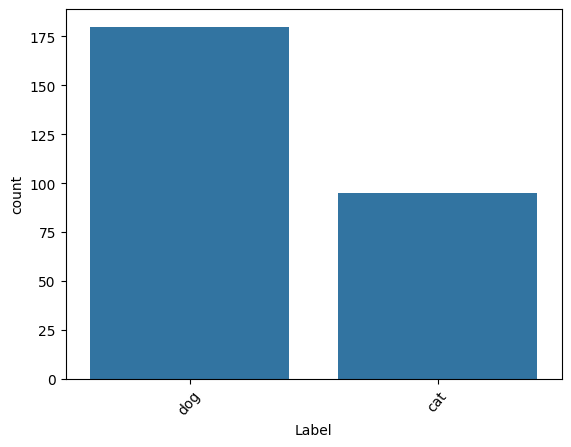

In [5]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [6]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 275 files belonging to 2 classes.
Using 220 files for training.
Found 275 files belonging to 2 classes.
Using 55 files for validation.


In [7]:
class_names = train.class_names
class_names

['cat', 'dog']

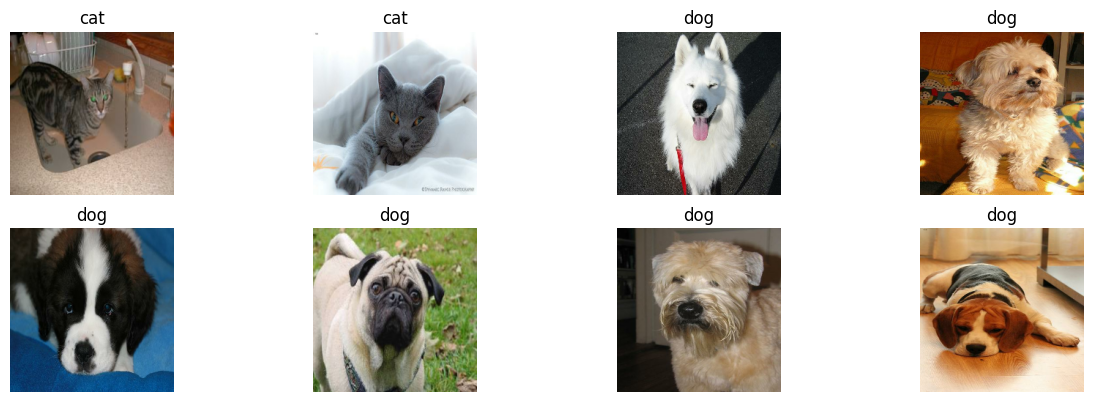

In [8]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B1(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(2,activation=tf.nn.softmax))
keras_model.summary()

28456008/28456008 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b1 (Functio  (None, 7, 7, 1280)        6931124   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 2)                 125442    
                                                                 
Total params: 7056566 (26.92 MB)
Trainable params: 125442 (490.01 KB)
Non-trainable params: 6931124 (26.44 MB)
_________________________________________________________________


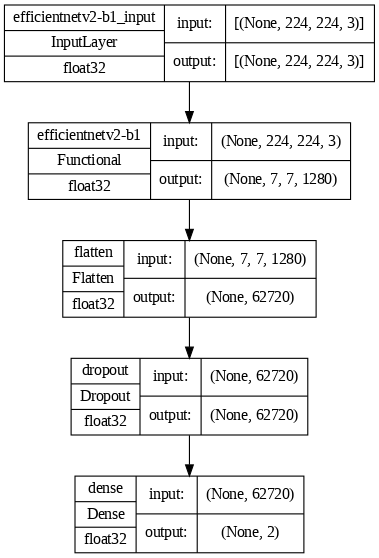

In [10]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [11]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [12]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [13]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=5,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/5
7/7 [==============================] - 46s 4s/step - loss: 0.2896 - accuracy: 0.8818 - val_loss: 5.4214e-05 - val_accuracy: 1.0000
Epoch 2/5
7/7 [==============================] - 20s 3s/step - loss: 0.0172 - accuracy: 0.9955 - val_loss: 8.3012e-07 - val_accuracy: 1.0000
Epoch 3/5
7/7 [==============================] - 24s 3s/step - loss: 0.0427 - accuracy: 0.9909 - val_loss: 5.2019e-08 - val_accuracy: 1.0000
Epoch 4/5
7/7 [==============================] - 23s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.2758e-07 - val_accuracy: 1.0000
Epoch 5/5
7/7 [==============================] - 24s 4s/step - loss: 2.9199e-04 - accuracy: 1.0000 - val_loss: 3.7713e-07 - val_accuracy: 1.0000


In [14]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.289606,0.881818,5.421413e-05,1.0
1,0.017223,0.995455,8.301191e-07,1.0
2,0.042734,0.990909,5.201857e-08,1.0
3,0.002789,1.000000,2.275809e-07,1.0
4,0.000292,1.000000,3.771335e-07,1.0


In [15]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 [==============================] - 4s 1s/step - loss: 3.7713e-07 - accuracy: 1.0000
Test Loss = 3.7713351730417344e-07
Test Accuracy = 1.0


In [16]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.289606,0.881818,5.421413e-05,1.0
1,0.017223,0.995455,8.301191e-07,1.0
2,0.042734,0.990909,5.201857e-08,1.0
3,0.002789,1.000000,2.275809e-07,1.0
4,0.000292,1.000000,3.771335e-07,1.0


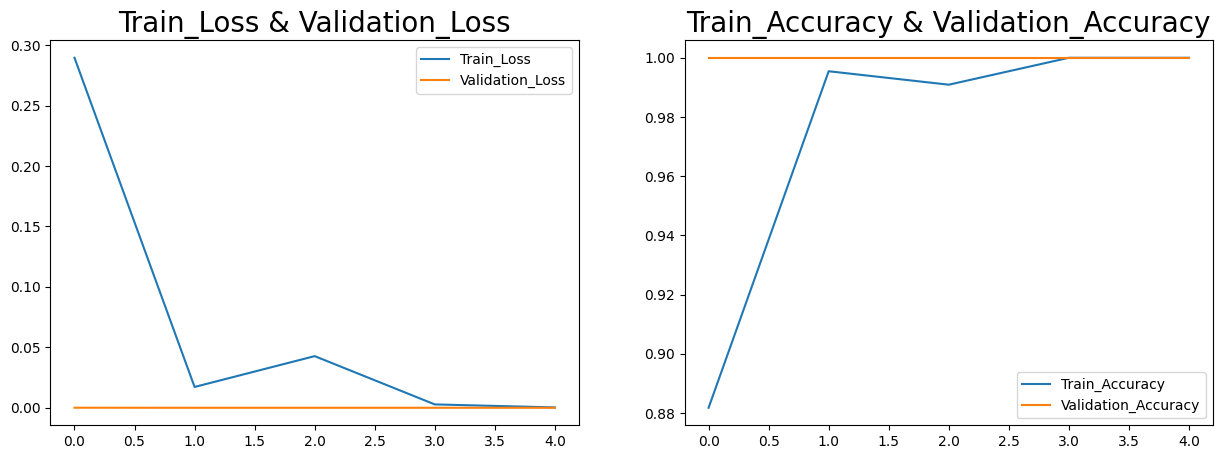

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [18]:
test= tf.keras.preprocessing.image_dataset_from_directory(
    image_test_data,
    image_size=(224,224),
    validation_split=None,
)

Found 70 files belonging to 2 classes.


In [19]:
test_score, test_acc = keras_model.evaluate(test)
print('Test Loss =', test_score)
print('Test Accuracy =', test_acc)

3/3 [==============================] - 14s 1s/step - loss: 0.1256 - accuracy: 0.9857
Test Loss = 0.12557385861873627
Test Accuracy = 0.9857142567634583


In [20]:
Accuracy = [('valid', score, acc),
          ('test', test_score, test_acc)
         ]

predict_test = pd.DataFrame(data = Accuracy, columns=['Model', 'loss', 'accuracy'])
predict_test

,Model,loss,accuracy
0,valid,3.771335e-07,1.000000
1,test,1.255739e-01,0.985714


1/1 [==============================] - 3s 3s/step


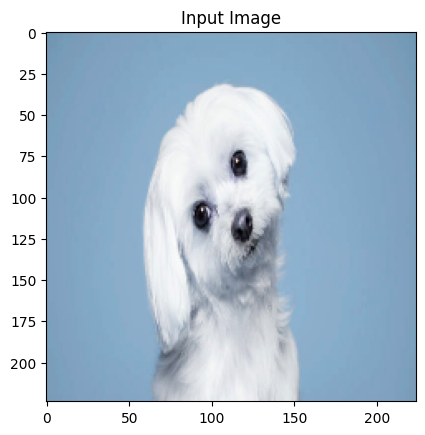

Predicted class: dog


In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Load the image
image_path = '/content/drive/MyDrive/Images/dog1.jpg'
image = cv2.imread(image_path)

# Check if the image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the image path.")
else:
    # Preprocess the image
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32') / 255.0

    # Add a batch dimension
    image = np.expand_dims(image, axis=0)

    # Make predictions
    predictions = keras_model.predict(image)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Print the input image and the predicted class
    plt.imshow(image[0])
    plt.title('Input Image')
    plt.show()
    print('Predicted class:', class_names[predicted_class]) # Make sure 'class_names' is defined